# Conformal predictive decision making

We tackle the same problem as https://www.alrw.net/articles/19.pdf, using our Nearest neighbours prediction machine

In [91]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from online_cp.CPS import NearestNeighboursPredictionMachine
from sklearn.preprocessing import LabelEncoder
import numpy as np
rnd_gen = np.random.default_rng(2024)
import matplotlib.pyplot as plt
MACHINE_EPSILON = lambda x: np.abs(x) * np.finfo(np.float64).eps

In [92]:
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X_raw = mushroom.data.features 
y_raw = mushroom.data.targets 

X = np.array([LabelEncoder().fit(col).transform(col) for col in X_raw.values.T]).T
y = y_raw.values.reshape(1, -1)[0]

In [119]:
N = 8
X_train = X[:N]
y_train = y[:N]

In [120]:
def U(y, d):
    if y == 'e':
        if d == 'eat':
            return 1
        if d == 'not eat':
            return 0
    if y == 'p':
        if d == 'eat':
            return -10
        if d == 'not eat':
            return 1

In [121]:
d = 'eat'
tau = rnd_gen.uniform(0, 1)
U_train_d = np.array([U(y, d) for y in y_train]).astype('float')

cps = NearestNeighboursPredictionMachine(k=3, distance='hamming', rnd_state=2024)
cps.learn_initial_training_set(X_train, U_train_d)
cpd = cps.predict_cpd(X[N])

{'eat': -2.382781062823371, 'not eat': 0.4152967234003031}
p


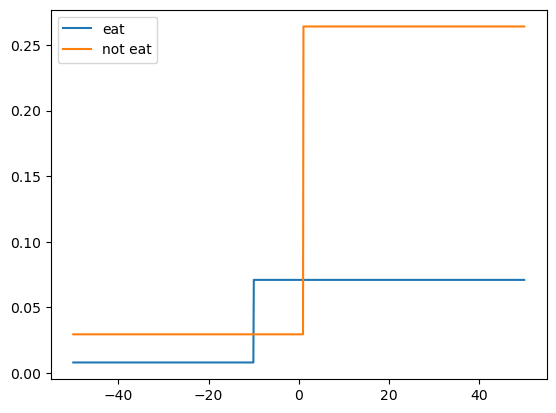

In [122]:
utility = {}
for d in ['eat', 'not eat']:
    tau = rnd_gen.uniform(0, 1)
    U_train_d = np.array([U(y, d) for y in y_train]).astype('float')

    cps = NearestNeighboursPredictionMachine(k=1, distance='hamming', rnd_state=2024)
    cps.learn_initial_training_set(X_train, U_train_d)
    cpd = cps.predict_cpd(X[N])

    jump_points = np.unique(cpd.Y[1:-1])
    Delta_Q = np.array([cpd(y=y + MACHINE_EPSILON(y), tau=tau) - cpd(y=y - MACHINE_EPSILON(y), tau=tau) for y in jump_points])
    utility[d] = jump_points @ Delta_Q

    yrange = np.linspace(-50, 50, num=1000, endpoint=True) 

    tau = rnd_gen.uniform(0, 1)
    plt.plot(
        yrange,
        [cpd(y=y, tau=tau) for y in yrange],
        label=d
    )

print(utility)
print(y[N])

plt.legend()